# Noise Analysis Tutorial

**In this notebook, we calculate noise psd, csd, and correlation coefficient and display them 
using QETpy utilities**

### Imports

In [2]:
from qetpy import Noise, foldpsd, calc_psd, calc_csd, calc_corrcoeff_from_csd
from qetpy.sim import TESnoise
from qetpy.utils import fold_spectrum
from qetpy.plotting import compare_noise, plot_noise_sim, plot_corrcoeff, plot_psd, plot_csd
import numpy as np
import matplotlib.pyplot as plt

### Load test data and set channel names

In [3]:
# Load data
traces_PT_on = np.load('traces.npy')

# save path
savePath = '' #user needs to define new path
# sample rate 
fs = 625e3 

# define the channel names
channels = [ 'PCS1' , 'PES1' , 'PFS1' , 'PAS2' , 'PBS2' , 'PES2' , 'PDS2' ] #define the channel names

### PSD Calculation

In [4]:
# let's calculate two-sided PSD
# input can be 
# 1D [num_samples]
# 2D [num_traces, num_samples] -> return mean traces 
# 3D [num_traces, numn_channels, num_samples] -> return mean traces 

psd_freqs, psd = calc_psd(traces_PT_on, fs=fs, folded_over=False)

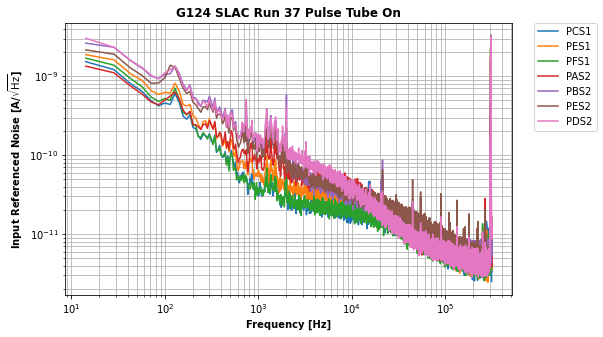

In [5]:
# if input two-sided, automatically fold for display

plot_psd(psd=psd, psd_freqs=psd_freqs, channels=channels, 
         title='G124 SLAC Run 37 Pulse Tube On', lgcoverlay=True, lgcsave=False)

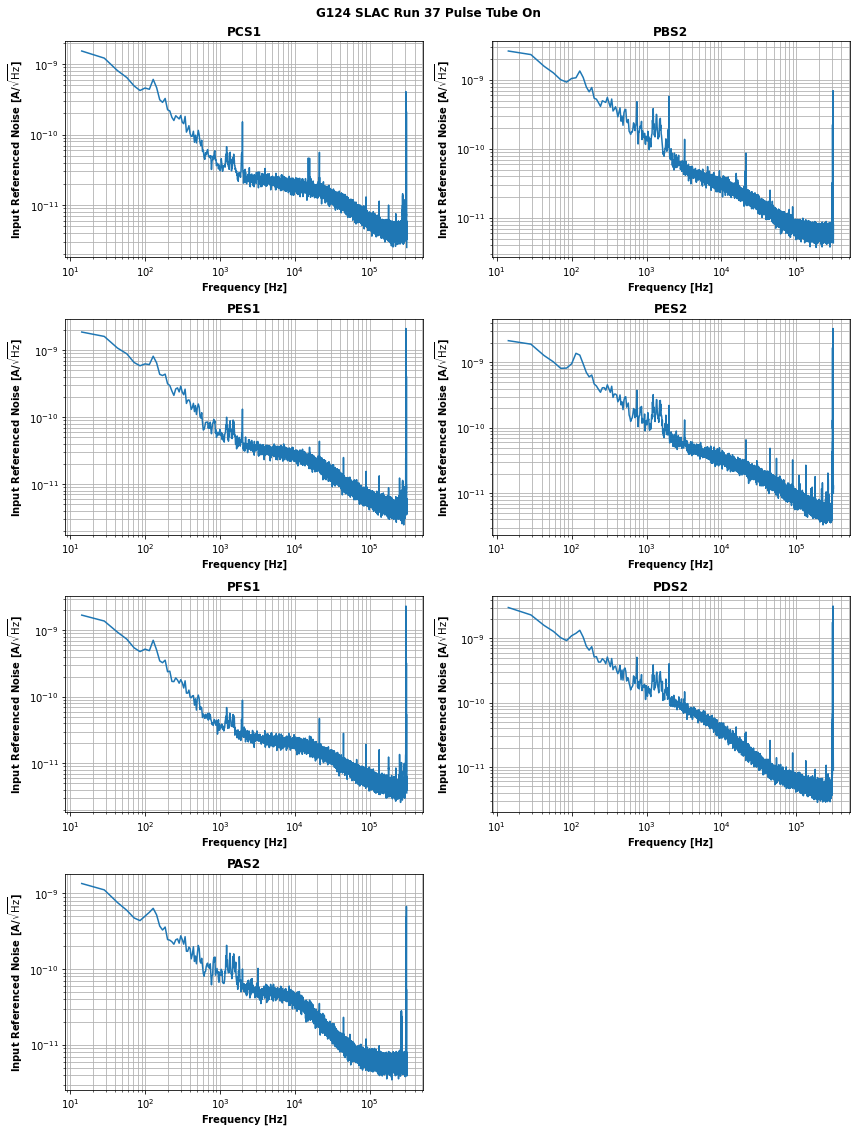

In [6]:
plot_psd(psd=psd, psd_freqs=psd_freqs, channels=channels, 
         title='G124 SLAC Run 37 Pulse Tube On', lgcoverlay=False)

### CSD  and Derived Correlation Coefficient

In [7]:
# two-sided CSD
csd_freqs, csd = calc_csd(traces_PT_on, fs=fs, folded_over=True)

# Correlation coefficient
# leplot_csd(whichcsd=['66','26'])t's fold first
csd_freqs_folded, csd_folded = fold_spectrum(csd, fs)
corrcoeff = calc_corrcoeff_from_csd(csd_folded)

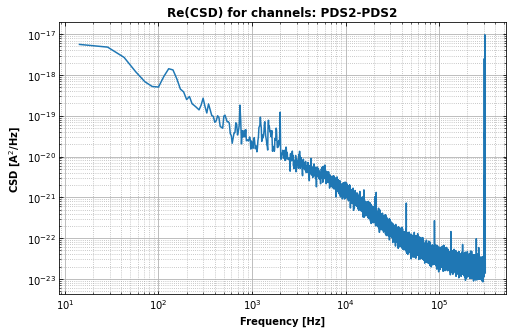

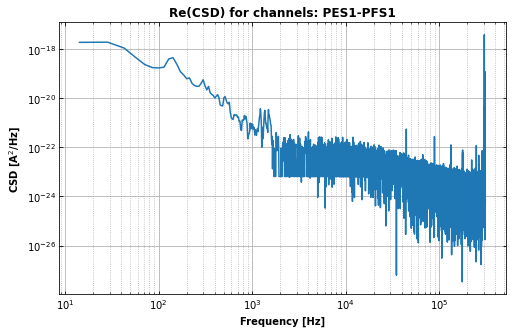

In [8]:
plot_csd(csd=csd, csd_freqs=csd_freqs, channels=channels, whichcsd=['66','12'])

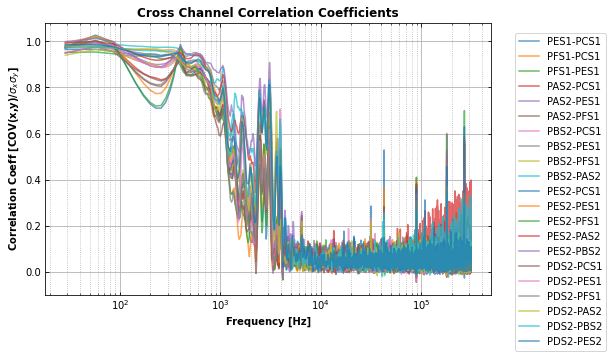

In [9]:
plot_corrcoeff(corrcoeff=corrcoeff, corrcoeff_freqs=csd_freqs_folded, 
               channels=channels, lgcsave=False, lgcsmooth=True, 
               nwindow=13 )

###  QETpy Noise class (soon the be deprecated)

In [10]:
Noise?

In [11]:
# instantiate Noise 
g124_noise = Noise(traces=traces_PT_on,
                   fs=fs, 
                   channames=channels,
                   name= 'G124 SLAC Run 37 Pulse Tube On') #initialize a noise object

#### Calculate the PSD and corrCoeff

In [12]:
g124_noise.calculate_psd()
g124_noise.calculate_corrcoeff()
g124_noise.calculate_csd()


####  Calculate unCorrelated noise

In [13]:
g124_noise.calculate_uncorr_noise()

#### plotting of PSD and corrCoeff

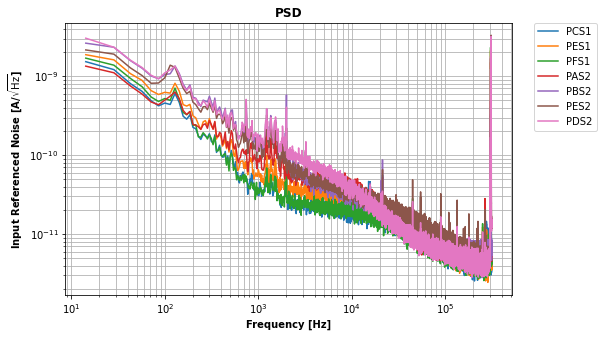

In [14]:
g124_noise.plot_psd(lgcoverlay=True)

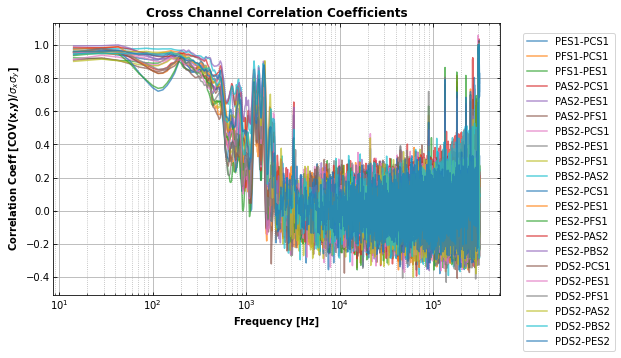

In [15]:
g124_noise.plot_corrcoeff(lgcsave=False, lgcsmooth=True, nwindow=13 )

Plot a few CSDs

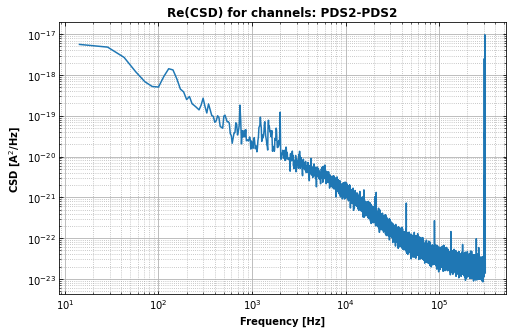

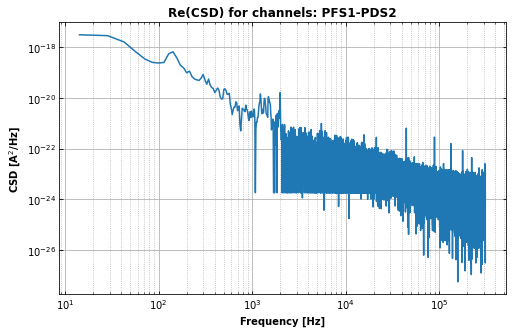

In [16]:
g124_noise.plot_csd(whichcsd=['66','26'])

Try to plot a CSD for a non existant channel

In [17]:
g124_noise.plot_csd(whichcsd=['68'])

index out of range


Try to save a figure with a bad path

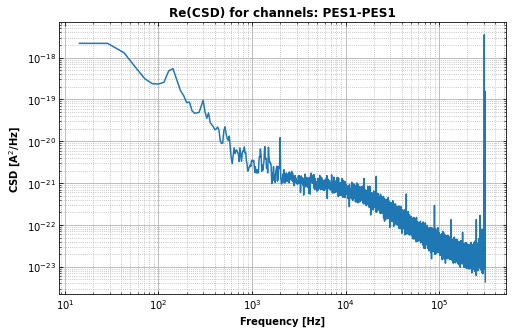

In [18]:
g124_noise.plot_csd(whichcsd=['11'], lgcsave=True, savepath='./')

Plot Real vs Imaginary PSDs

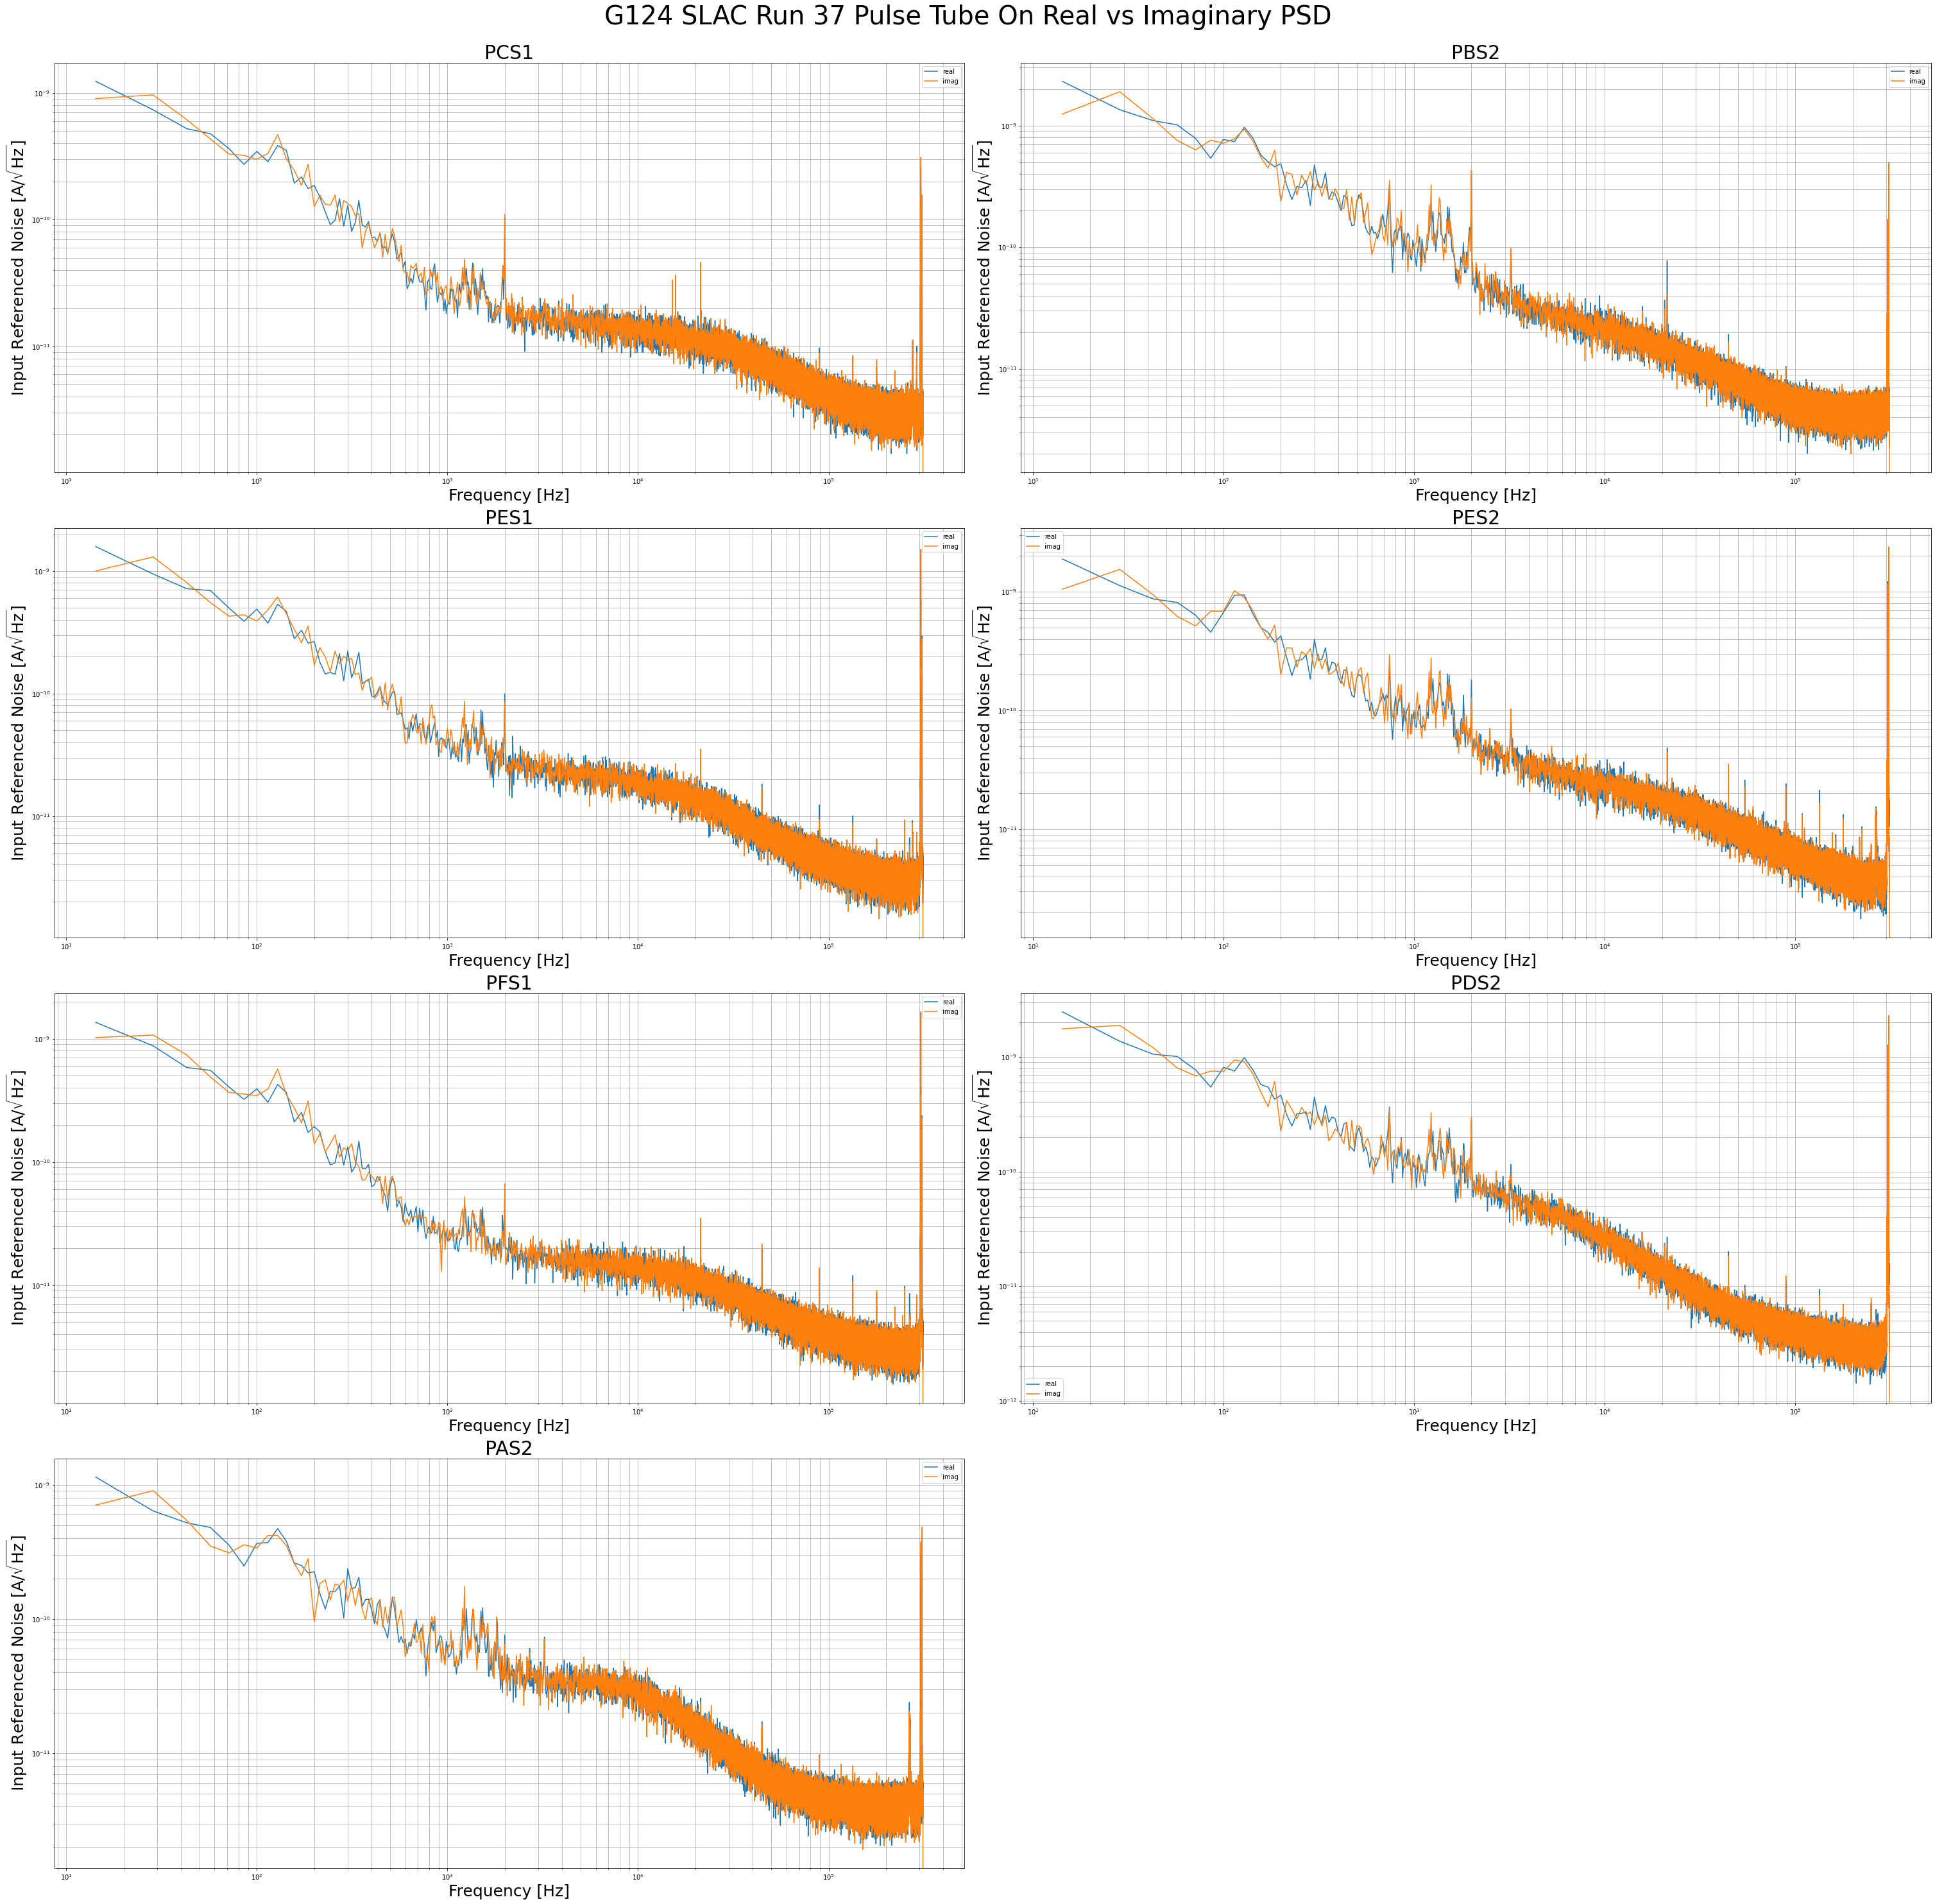

In [19]:
g124_noise.plot_reim_psd()

Plot unCorrelated part of the noise PSD

In [20]:
g124_noise.calculate_uncorr_noise()

/home/serfass/.local/lib/python3.6/site-packages/qetpy/plotting/_noise_plotting.py:533: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(noise.corrnoise[ii][1:]),
/home/serfass/.local/lib/python3.6/site-packages/qetpy/plotting/_noise_plotting.py:533: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(noise.corrnoise[ii][1:]),
/home/serfass/.local/lib/python3.6/site-packages/qetpy/plotting/_noise_plotting.py:533: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(noise.corrnoise[ii][1:]),
/home/serfass/.local/lib/python3.6/site-packages/qetpy/plotting/_noise_plotting.py:533: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(noise.corrnoise[ii][1:]),
/home/serfass/.local/lib/python3.6/site-packages/qetpy/plotting/_noise_plotting.py:533: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(noise.corrnoise[ii][1:]),
/home/serfass/.local/lib/python3.6/site-packages/qetpy/plotting/_noise_plotting.py:533: RuntimeWarning: invalid value encountered 

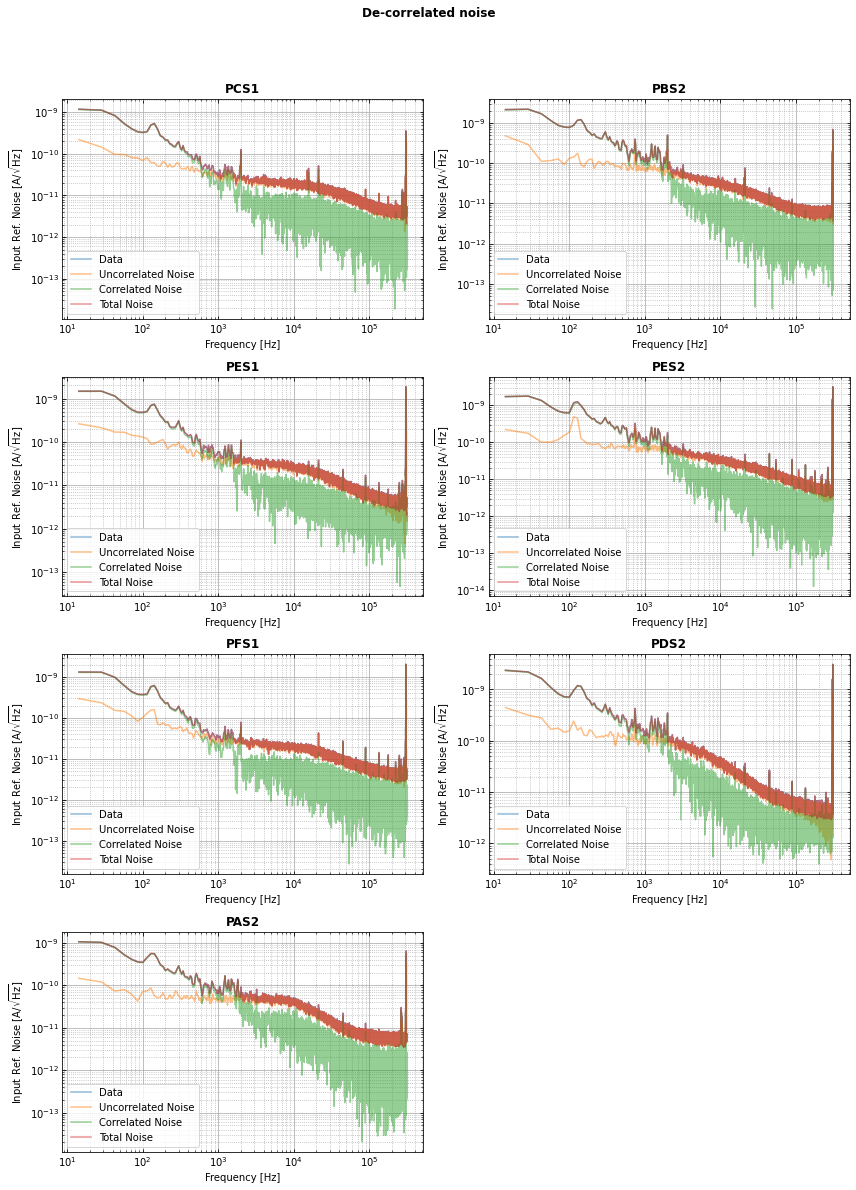

In [21]:
g124_noise.plot_decorrelatednoise(lgccorrelated=True,lgcsum = True, lgcsave=False)

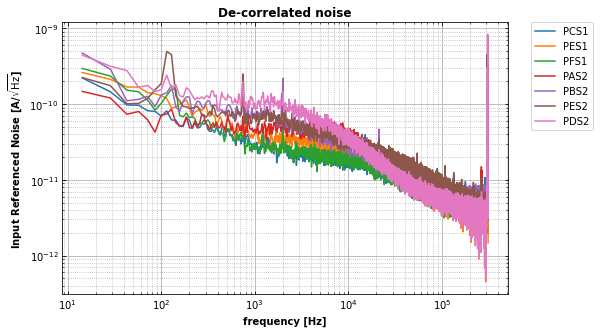

In [22]:
g124_noise.plot_decorrelatednoise(lgcoverlay = True)